In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import cut

In [12]:
shopping_df = pd.read_csv('shopping_behavior_updated.csv')
shopping_df.head()

shopping_df.info()

shopping_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


0       46~55
1       18~24
2       46~55
3       18~24
4       36~45
        ...  
3895    36~45
3896    46~55
3897    46~55
3898    36~45
3899    46~55
Name: Age_cut, Length: 3900, dtype: category
Categories (7, object): ['18~24' < '25~30' < '31~35' < '36~45' < '46~55' < '56~65' < '66~']


C:\Users\TJ\AppData\Local\Temp\ipykernel_12728\330412450.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_df.groupby(['Age_cut', 'Category'])
C:\Users\TJ\AppData\Local\Temp\ipykernel_12728\330412450.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_df.groupby(['Age_cut', 'Color'])
C:\Users\TJ\AppData\Local\Temp\ipykernel_12728\330412450.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shoppin

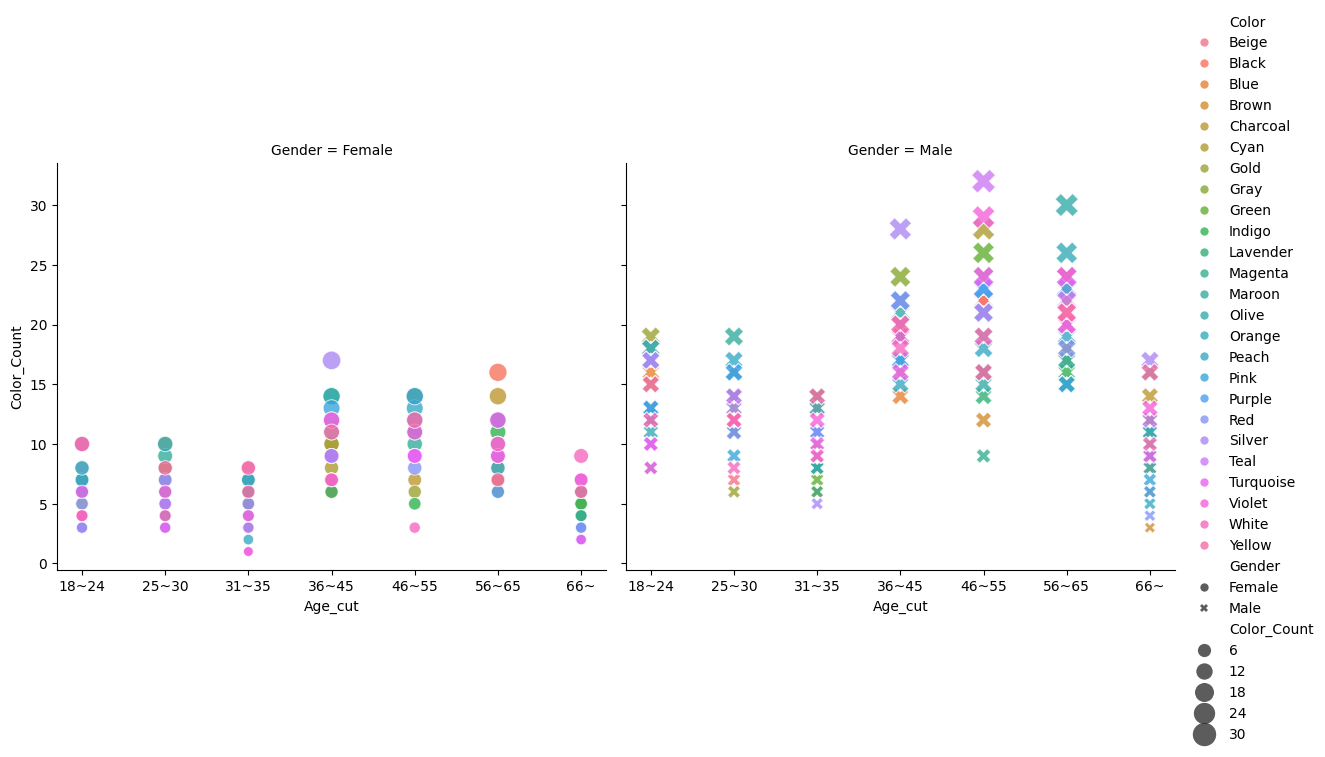

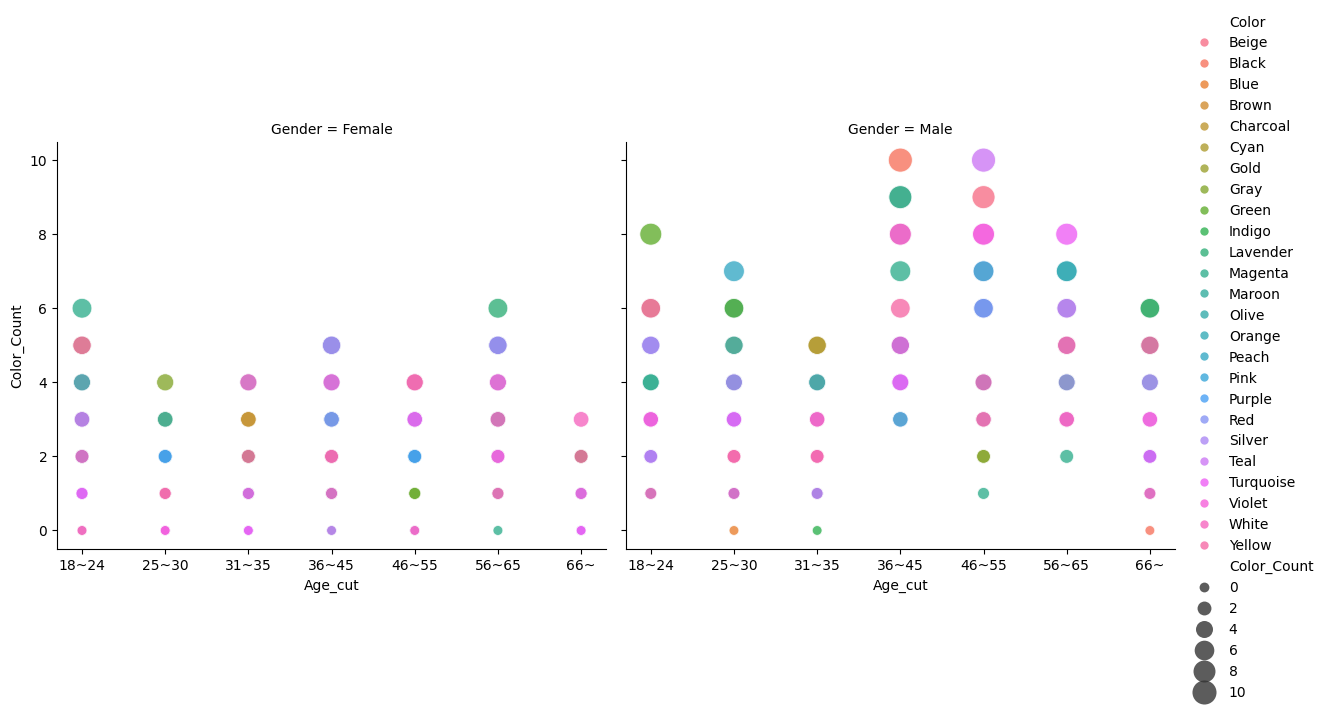

,Age_cut,Color,Gender,Season,Color_Count
3,18~24,Beige,Female,Winter,3
7,18~24,Beige,Male,Winter,2
11,18~24,Black,Female,Winter,1
15,18~24,Black,Male,Winter,2
19,18~24,Blue,Female,Winter,4


In [141]:
fig, ax = plt.subplots(2, 3, figsize=(100, 100))




max_age =shopping_df['Age'].max()

shopping_df['Age_cut'] = pd.cut(shopping_df['Age'],
                                bins = [17, 24, 30, 35, 45, 55, 65, max_age],
                                labels= ['18~24', '25~30', '31~35', '36~45', '46~55', '56~65', '66~'])


#shopping_df['Category_Count'] = 

#print(shopping_df['Age_cut'])

print(shopping_df['Age_cut'])

#shopping_df['Category_Count'] = shopping_df['Category'].value_counts()

#print(shopping_df['Category_Count'])

#age_category_count_df = shopping_df.groupby(['Age_cut', 'Category']).size().reset_index(name='Category_Count')

age_category_df = (
    shopping_df.groupby(['Age_cut', 'Category'])
    .size()
    .reset_index(name='Category_Count')
)
# .size()는 각 그룹의 “행 개수(row count)”를 반환합니다.

age_color_df = (
    shopping_df.groupby(['Age_cut', 'Color'])
    .size()
    .reset_index(name='Color_Count')
)

age_color_gender_df = (
    shopping_df.groupby(['Age_cut', 'Color', 'Gender'])
    .size()
    .reset_index(name='Color_Count')
)

age_color_gender_season_df = (
    shopping_df.groupby(['Age_cut', 'Color', 'Gender', 'Season'])
    .size()
    .reset_index(name='Color_Count')
)

winter_df = age_color_gender_season_df[age_color_gender_season_df['Season'] == 'Winter'].dropna(subset=['Age_cut','Color', 'Gender', 'Color_Count' ])



#print(age_color_gender_df)

#print(age_color_df)


#print(age_category_df)

#print(winter_df)




sns.barplot(data=age_category_df, x='Age_cut', y='Category_Count', hue='Category', ax=ax[0,0])

sns.scatterplot(data=age_color_df, x='Age_cut', y='Color_Count', hue='Color',
                ax=ax[0,1], size='Color_Count', sizes=(100, 500))

sns.scatterplot(data=age_color_gender_df, x='Age_cut', y='Color_Count', hue='Color',
                ax=ax[0, 2], size='Color_Count', sizes=(100, 500), style='Gender', alpha=0.8)


sns.relplot(
    data=age_color_gender_df,
    x='Age_cut',
    y='Color_Count',
    hue='Color',
    size='Color_Count',
    sizes=(50, 300),
    style='Gender',
    alpha=0.8,
    col='Gender',    # 성별별로 나누기
    kind='scatter',
    height=5,
    aspect=1.2
)

sns.scatterplot(
    data=age_color_gender_season_df,
    x='Color_Count', y='Color', hue='Season',
    ax=ax[1,0]
)


sns.relplot(
    data=winter_df,
    x='Age_cut',
    y='Color_Count',
    hue='Color',
    col='Gender',
    height=5,
    aspect=1.2,
    size='Color_Count',
    sizes=(50, 300),
    kind='scatter',
    alpha=0.8

)



plt.show()


winter_df.head()


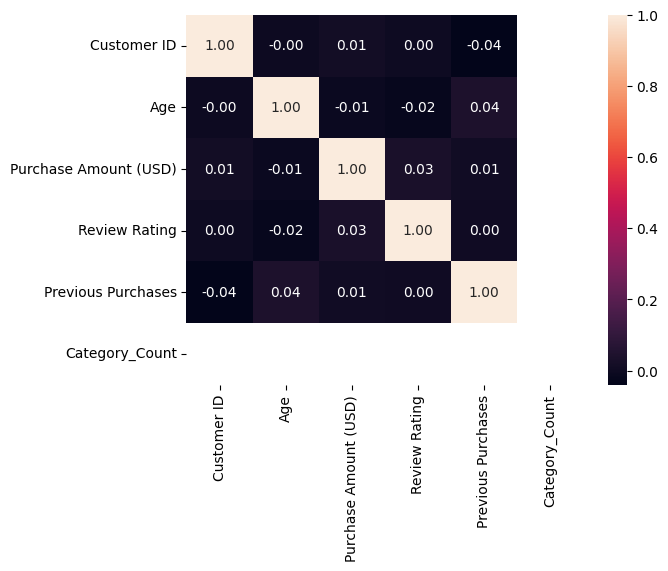

In [121]:
shopping_corr_df = shopping_df.corr(numeric_only=True)

sns.heatmap(data=shopping_corr_df, annot=True, fmt='0.2f')

plt.show()